In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\Downloads\train.csv')


pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

In [4]:
df=df.drop(['Id'],axis=1)

In [5]:
df.shape

(1460, 80)

# Missing Values

In [6]:
na_values=[i for i in df.columns if df[i].isnull().sum()>1]

for i in na_values:
    print(i, np.round(df[i].isnull().mean()* 100, 2),  ' % missing values')
    print(i, np.array(df[i].isnull().sum()),  'missing values')

LotFrontage 17.74  % missing values
LotFrontage 259 missing values
Alley 93.77  % missing values
Alley 1369 missing values
MasVnrType 0.55  % missing values
MasVnrType 8 missing values
MasVnrArea 0.55  % missing values
MasVnrArea 8 missing values
BsmtQual 2.53  % missing values
BsmtQual 37 missing values
BsmtCond 2.53  % missing values
BsmtCond 37 missing values
BsmtExposure 2.6  % missing values
BsmtExposure 38 missing values
BsmtFinType1 2.53  % missing values
BsmtFinType1 37 missing values
BsmtFinType2 2.6  % missing values
BsmtFinType2 38 missing values
FireplaceQu 47.26  % missing values
FireplaceQu 690 missing values
GarageType 5.55  % missing values
GarageType 81 missing values
GarageYrBlt 5.55  % missing values
GarageYrBlt 81 missing values
GarageFinish 5.55  % missing values
GarageFinish 81 missing values
GarageQual 5.55  % missing values
GarageQual 81 missing values
GarageCond 5.55  % missing values
GarageCond 81 missing values
PoolQC 99.52  % missing values
PoolQC 1453 missi

Relationship between Missing values and entered values


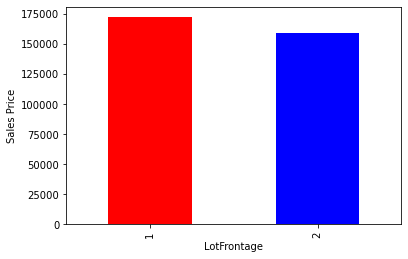

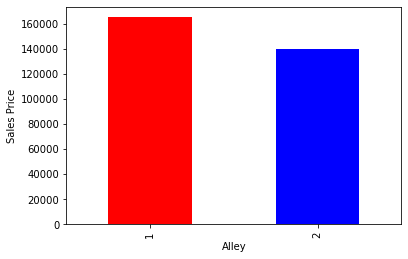

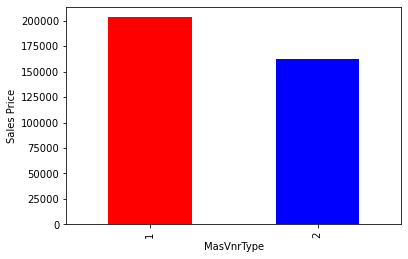

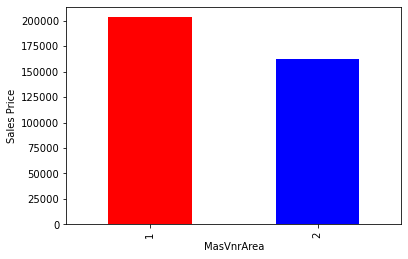

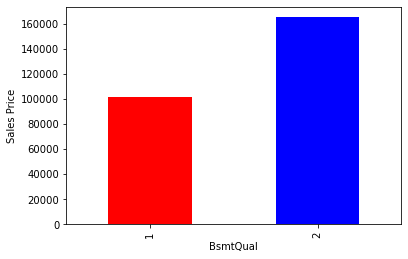

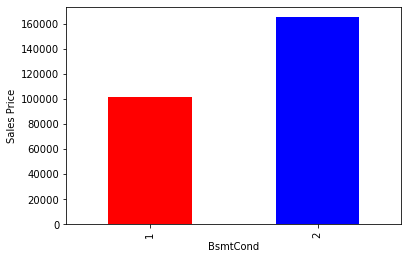

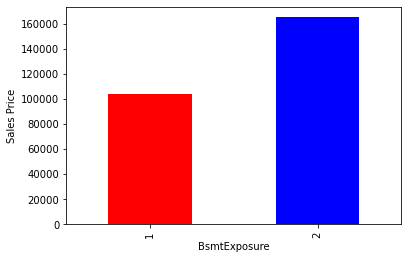

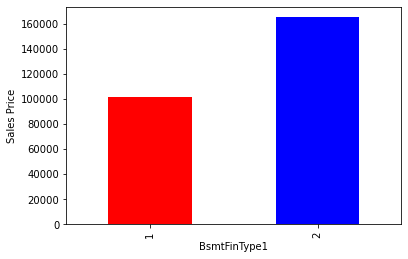

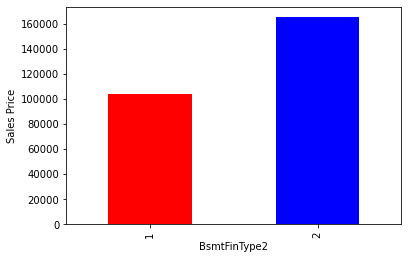

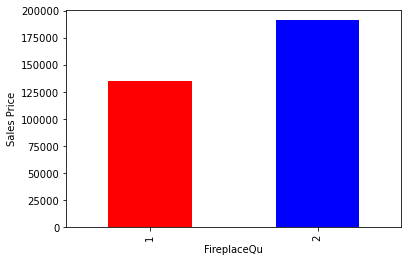

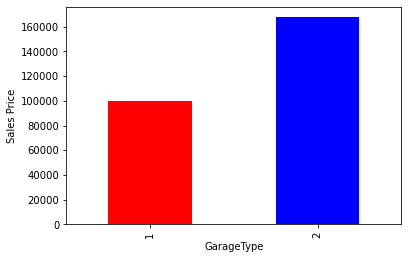

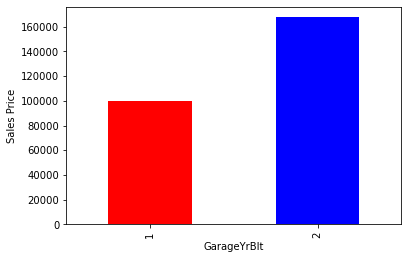

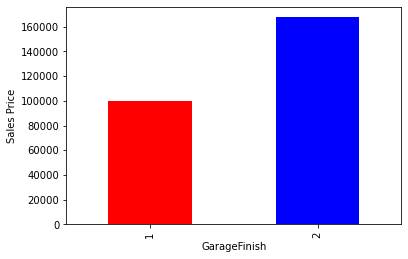

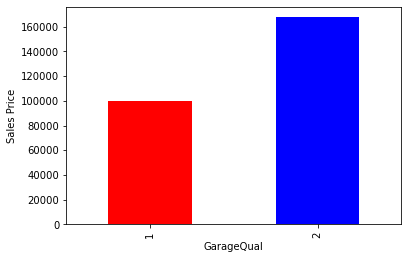

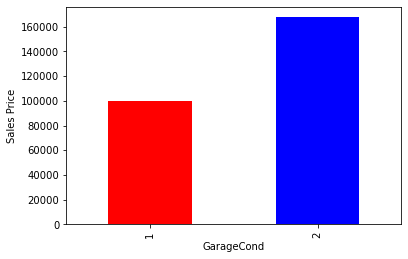

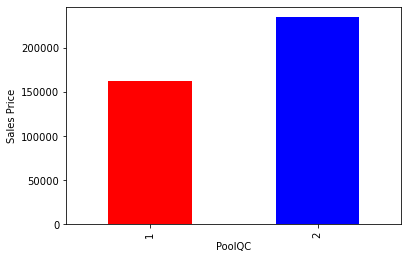

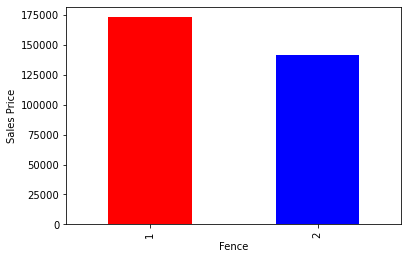

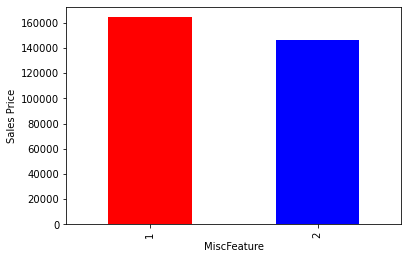

In [7]:
for i in na_values:
    data = df.copy()
    
    data[i] = np.where(data[i].isnull(), 1, 2)
    
    # Here, the missing values(1) and entered values(2) are plotted with respect to SalesPrice to understand the relationship between them
    data.groupby(i)['SalePrice'].median().plot.bar(color =['red','blue'],ylabel='Sales Price')
    plt.show()

## CDF and PDF

[0.10136986 0.49520548 0.25547945 0.09246575 0.03493151 0.0130137
 0.00273973 0.00205479 0.00136986 0.00136986]
[ 34900. 106910. 178920. 250930. 322940. 394950. 466960. 538970. 610980.
 682990. 755000.]


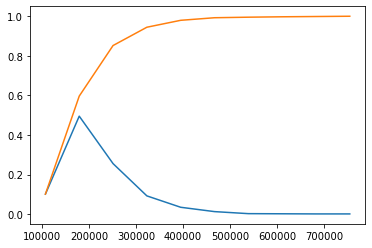

In [8]:
counts, bin_edges = np.histogram(df['SalePrice'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show()


# Numerical Features

In [9]:
numerical_features = [i for i in df.columns if df[i].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  37


In [10]:
# visualise the numerical variables
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


**Temporal Variables**



In [11]:
year_feature = [i for i in numerical_features if 'Yr' in i or 'Year' in i]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0.5, 1.0, 'House Price vs YearSold')

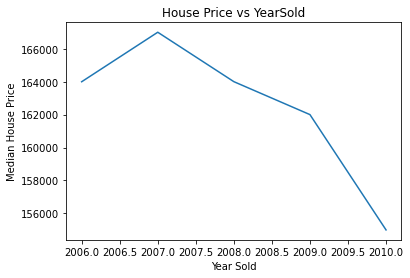

In [12]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")


In [14]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

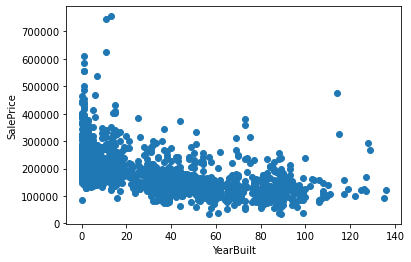

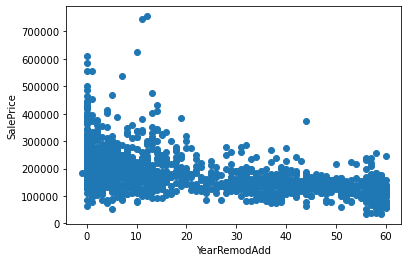

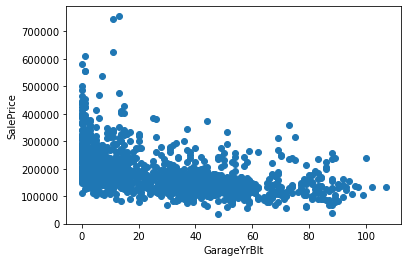

In [15]:
## The above graph info is unlikely to happen as Price is generally expected to rise as years go by.
## Here we will compare the difference between all years feature with SalePrice

for i in year_feature:
    if i!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[i]=data['YrSold']-data[i]

        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

In the above graph you can see that the sales price is rising with respect to the number of years.  


**Discrete Feature**

In [16]:
discrete_feature=[i for i in numerical_features if len(df[i].unique())<25 and i not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


**Continuous Features**

In [17]:
continuous_feature=[i for i in numerical_features if i not in discrete_feature+year_feature]

print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


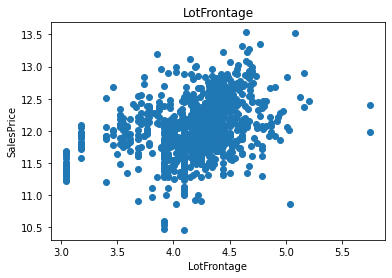

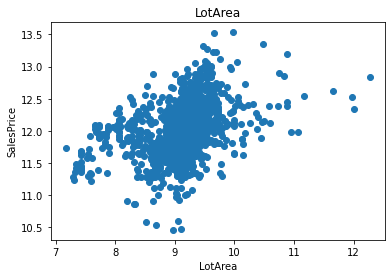

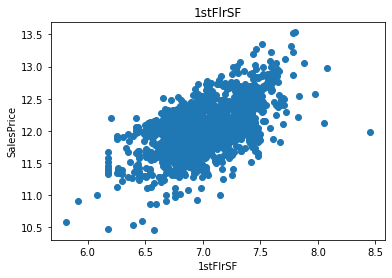

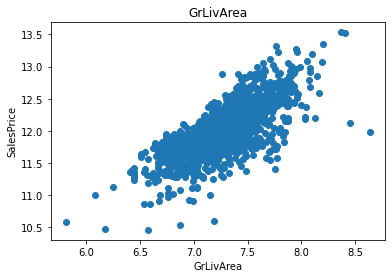

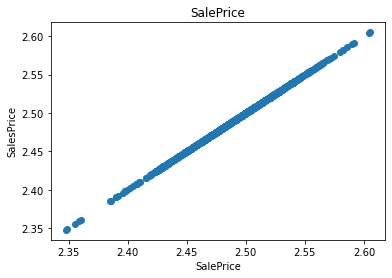

In [18]:
#Taking continuous feature without missing values and converting it to logorithmic form

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
